# Proyecto 1 : Emanuel Caneva - Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA AQUÍ TU RESPUESTA**

En principio todos los datos disponibles de las propiedades pueden ser útiles, luego seguramente el modelo dirá cuáles prevalecen sobre otros, pero seguramente puede influir el tamaño de la propiedad, tamaño del lote si es una casa, la ubicación o el barrio donde este ubicada, los años que tiene la propiedad, no es lo mismo si es a estrenar que una propiedad antigua.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

**0. Importa las librerías necesarias para trabajar en la consigna.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.**

In [2]:
dataset_properati = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
dataset_properati.shape

(146660, 19)

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [3]:
print(dataset_properati.isna().sum())

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


In [4]:
#Exploramos el dataset
dataset_properati.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [5]:
#Renombramos las columnas l1 l2 y l3
dataset_properati = dataset_properati.rename(columns={"l1": "Pais","l2": "Region", "l3": "Barrio"})
dataset_properati.head()

,start_date,end_date,created_on,lat,lon,Pais,Region,Barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [6]:
#Descripcion del Dataset
print(dataset_properati.describe())

                 lat            lon          rooms       bedrooms  \
count  136735.000000  136701.000000  146660.000000  146660.000000   
mean      -34.604896     -58.465304       3.079817       1.983240   
std         0.468428       0.486190       1.416352       1.151304   
min       -35.318457    -180.000000       1.000000       0.000000   
25%       -34.627667     -58.504012       2.000000       1.000000   
50%       -34.600943     -58.443262       3.000000       2.000000   
75%       -34.574600     -58.407586       4.000000       3.000000   
max        85.051129     -57.805832      35.000000      15.000000   

           bathrooms  surface_total  surface_covered         price  
count  140703.000000  126133.000000    125046.000000  1.466600e+05  
mean        1.599994     216.872888       112.818011  2.412211e+05  
std         0.889324    2037.606649       916.857584  3.185195e+05  
min         1.000000      10.000000         1.000000  5.500000e+03  
25%         1.000000      52.0000

In [7]:
#Tipo de datos
dataset_properati.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
Pais                object
Region              object
Barrio              object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [8]:
#Totales por tipos de propiedades
dataset_properati['property_type'].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

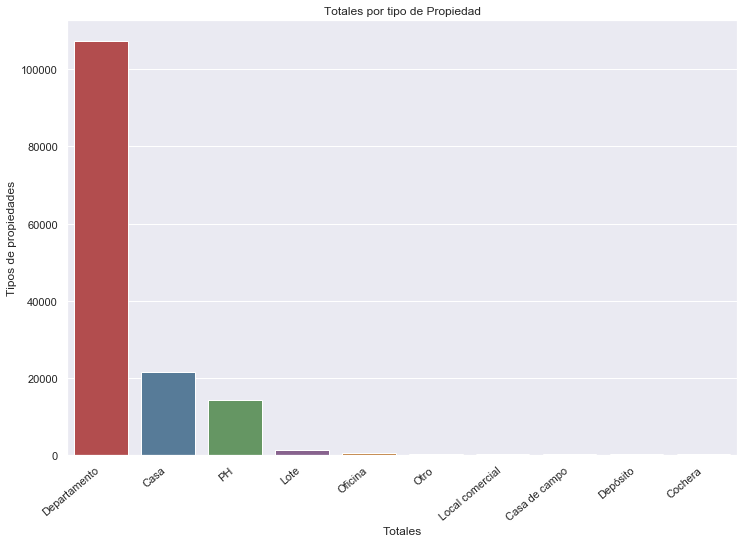

In [9]:
#Graficamos los totales por tipos de propiedades
plt.figure(figsize = (12,8))
sns.set(style="darkgrid")
ax=sns.countplot(x="property_type",data=dataset_properati,order=dataset_properati['property_type'].value_counts().index,palette="Set1",saturation=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Totales por tipo de Propiedad')
plt.xlabel('Totales')
plt.ylabel('Tipos de propiedades')
plt.show()

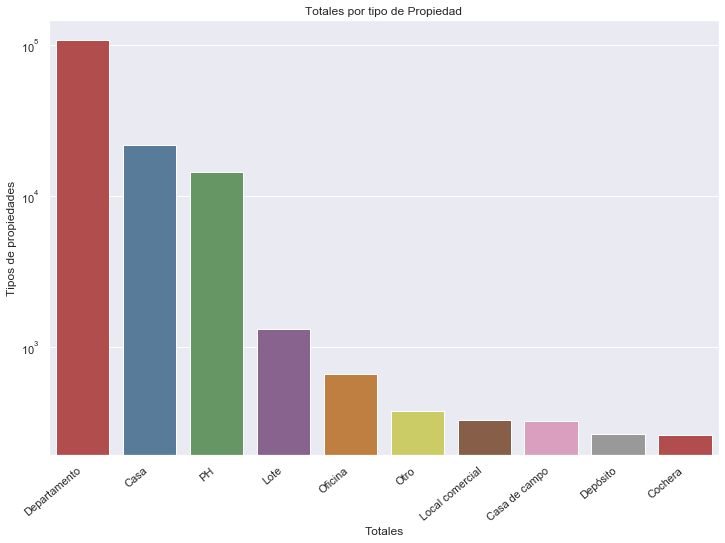

In [10]:
#Como otra alternatica de visulalización graficamos los totales por tipos de propiedades con una escala logarítmica
plt.figure(figsize = (12,8))
sns.set(style="darkgrid")
ax=sns.countplot(x="property_type",data=dataset_properati,order=dataset_properati['property_type'].value_counts().index,palette="Set1",saturation=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Totales por tipo de Propiedad')
plt.xlabel('Totales')
plt.ylabel('Tipos de propiedades')
plt.yscale('log')
plt.show()

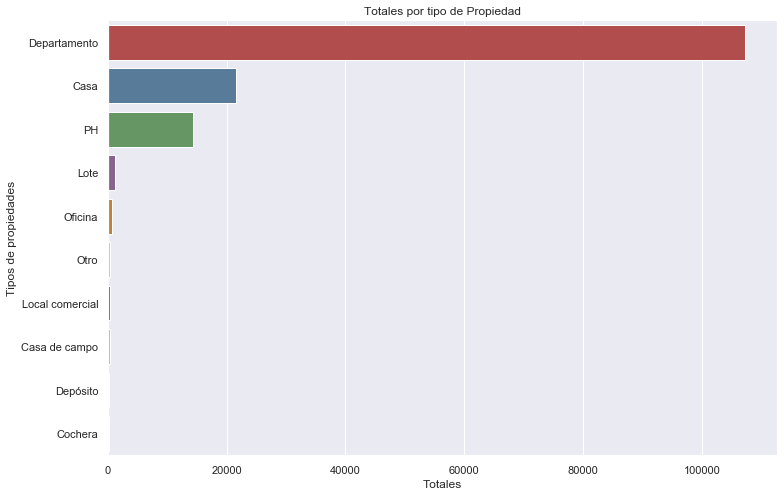

In [11]:
#Como otra alternatica de visulalización graficamos los totales por tipos de propiedades con barras horizontales
plt.figure(figsize = (12,8))
sns.set(style="darkgrid")
sns.countplot(y="property_type",data=dataset_properati,order=dataset_properati['property_type'].value_counts().index,palette="Set1",saturation=0.5)
plt.title('Totales por tipo de Propiedad')
plt.xlabel('Totales')
plt.ylabel('Tipos de propiedades')
#plt.xscale('log')
plt.show()

4. **¿De qué regiones son las publicaciones?** Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

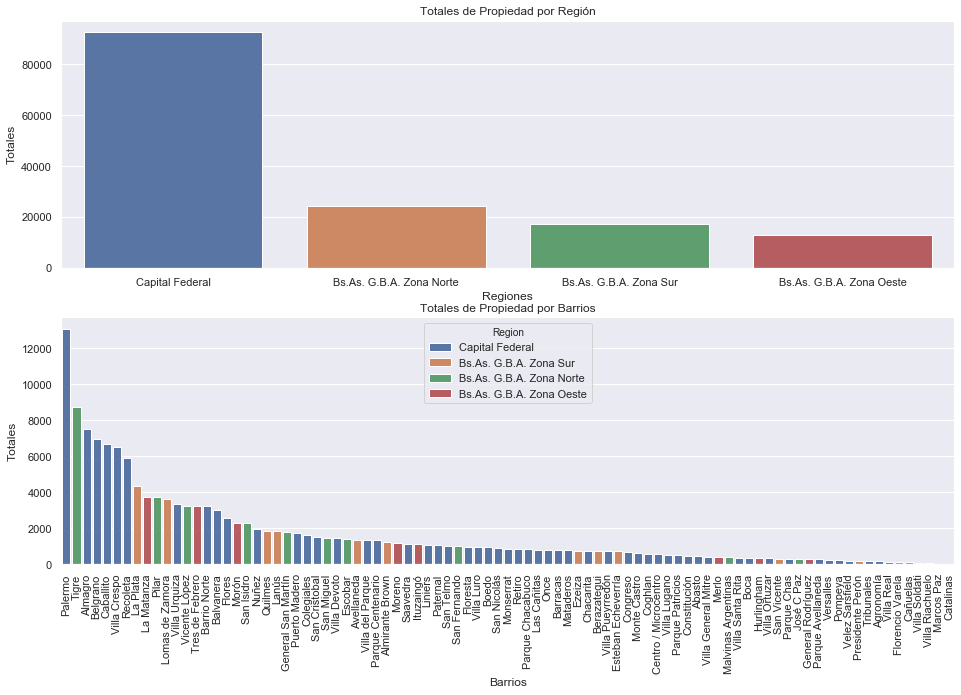

In [12]:
#Graficamos los totales por propiedades de Regiones y Barrios
plt.figure(figsize = (16,10))

plt.subplot(2,1,1)
ax1=sns.countplot(x="Region",data=dataset_properati,order=dataset_properati['Region'].value_counts().index)
plt.title('Totales de Propiedad por Región')
plt.xlabel('Regiones')
plt.ylabel('Totales')

plt.subplot(2,1,2)
ax2=sns.countplot(x="Barrio",hue="Region",data=dataset_properati,order=dataset_properati['Barrio'].value_counts().index,dodge=False)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="center")
plt.title('Totales de Propiedad por Barrios')
plt.xlabel('Barrios')
plt.ylabel('Totales')

plt.show()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [13]:
#Filtramos en dataset por tipo de propiedades y región
filtro_tipo_prop=np.logical_and(dataset_properati.property_type.isin(['Departamento','Casa','PH']),dataset_properati.Region == 'Capital Federal')
print(dataset_properati[filtro_tipo_prop].shape)

(91485, 19)


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

**A.Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables**

In [14]:
dataset_filtrado = dataset_properati[filtro_tipo_prop]
dataset_analisis = dataset_filtrado.drop(['lat','lon'],axis = 'columns')
dataset_analisis.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


**B 1. Graficar surface_total.**

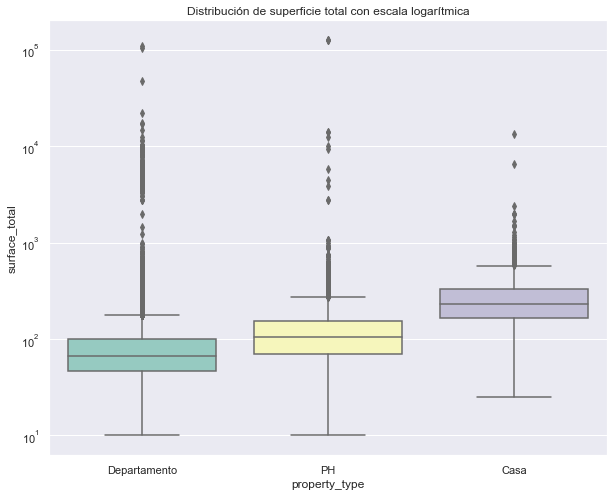

In [15]:
#Haciendo boxplot simple es muy difícil de visulalizar, por eso se aplica una escala logaritmica 
#para determinar un rango razonable estimado y ver cuáles son los valores atípicos
plt.figure(figsize = (10,8))
sns.boxplot(data=dataset_analisis,x="property_type",y = "surface_total",palette="Set3",)
plt.title('Distribución de superficie total con escala logarítmica')
plt.yscale('log')
plt.show()

In [16]:
print(dataset_analisis['surface_total'].quantile(0.25))
print(dataset_analisis['surface_total'].quantile(0.5))
print(dataset_analisis['surface_total'].quantile(0.75))
print(dataset_analisis['surface_total'].quantile(0.95))

49.0
71.0
111.0
250.0


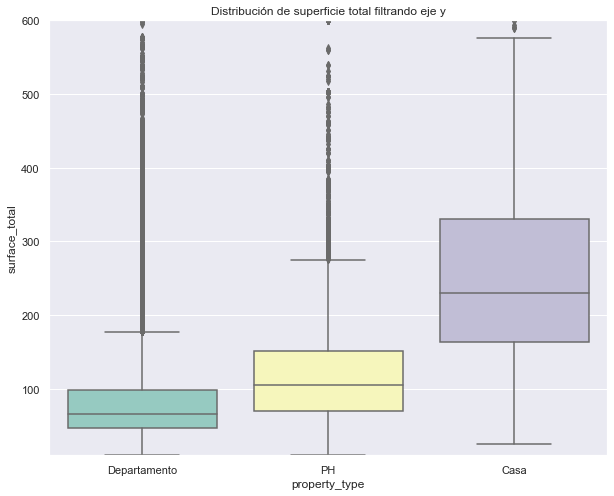

In [17]:
#B 2. boxplot con eje y entre 10 y 600
plt.figure(figsize = (10,8))
sns.boxplot(data=dataset_analisis, x="property_type",y="surface_total",palette="Set3")
plt.title('Distribución de superficie total filtrando eje y')
plt.ylim(10,600)
plt.show()

Text(0.5, 1.0, 'Distribución de superficie total')

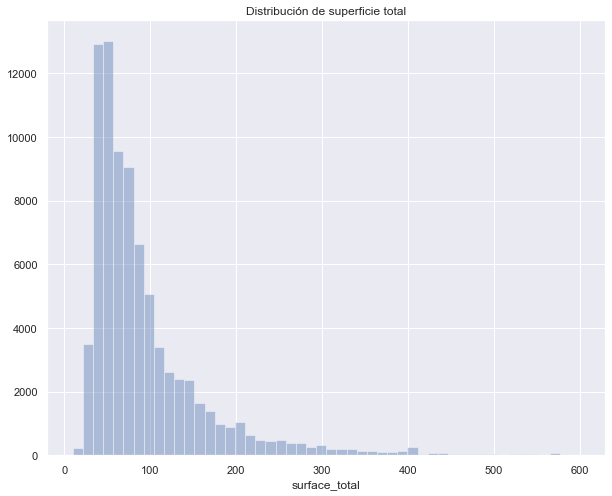

In [18]:
#B y C. histograma de la variable superficie total aplicando un rango para que se visualice de manera legible
plt.figure(figsize = (10,8))
sns.distplot(dataset_analisis['surface_total'],bins=50,kde=False,hist=True,hist_kws={"range": [10,600]})
plt.title('Distribución de superficie total')

**D Filtrar las instancias que tiene surface_covered mayor a surface_total**

In [19]:
# Se filtran las variables que cumplen esa condiciín para luego filtrar el dataset sin esas varialbles
mascara_sup=dataset_analisis['surface_covered']>dataset_analisis['surface_total']
print(dataset_analisis[mascara_sup].shape)

(760, 17)


**E. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. 
Puede ser útil un boxplot para determinar un rango razonable.**

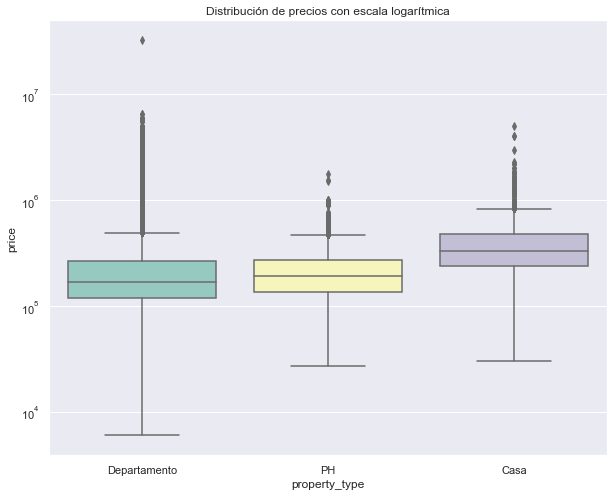

In [20]:
#Haciendo boxplot simple es muy difícil de visulalizar, por eso se aplica una escala logaritmica para determinar un rango
# razonable estimado y ver cuáles son los valores atípicos
plt.figure(figsize = (10,8))
sns.boxplot(data=dataset_analisis,x="property_type",y = "price",palette="Set3")
plt.title('Distribución de precios con escala logarítmica')
plt.yscale('log')
plt.show()

In [21]:
print(dataset_analisis['price'].quantile(0.25))
print(dataset_analisis['price'].quantile(0.5))
print(dataset_analisis['price'].quantile(0.75))
print(dataset_analisis['price'].quantile(0.95))

120000.0
175000.0
279000.0
695000.0


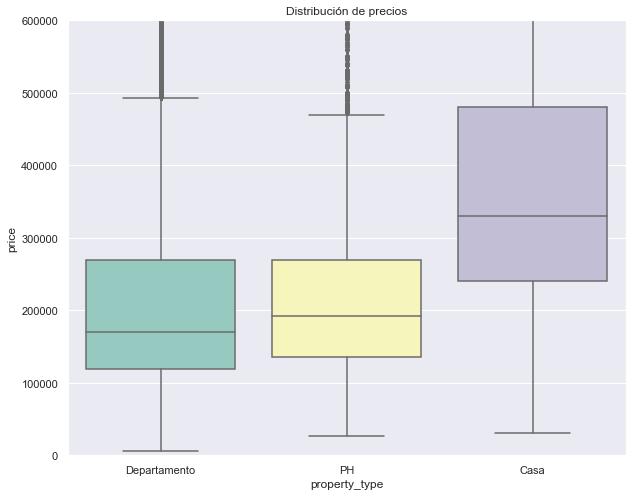

In [22]:
#Boxplot con eje y entre 0 y 6000000 - Como se puede ver los valores de las casas son mjuy superiores a departamentos y PH
#y disorcionan en gráfico
plt.figure(figsize = (10,8))
sns.boxplot(data=dataset_analisis, x="property_type",y="price",palette="Set3")
plt.title('Distribución de precios')
plt.ylim(0,600000)
plt.show()

Text(0.5, 1.0, 'Distribución de la variable Precio')

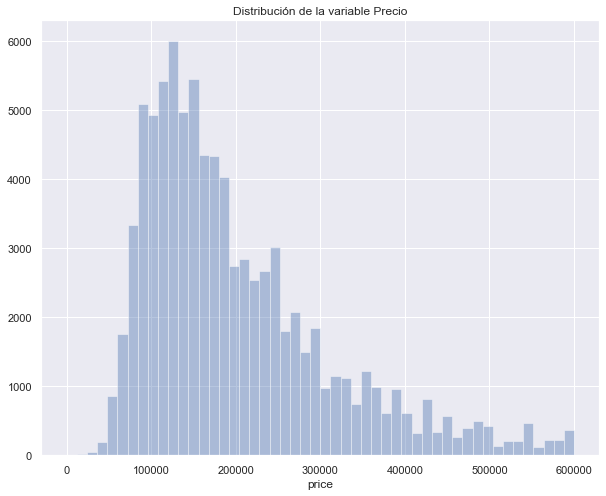

In [23]:
#histograma de la variable precio aplicando un rango para que se visualice de manera legible
plt.figure(figsize = (10,8))
sns.distplot(dataset_analisis['price'],bins=50,kde=False,hist=True,hist_kws={"range": [0,600000]})
plt.title('Distribución de la variable Precio')

**F. Filtrado del dataset para Pairplot**

In [24]:
mascara_pairplot=(dataset_analisis['surface_covered']<=dataset_analisis['surface_total']) & (dataset_analisis['surface_total']<=300) & (dataset_analisis['price']<=600000)
print(dataset_analisis[mascara_pairplot].shape)

(74860, 17)


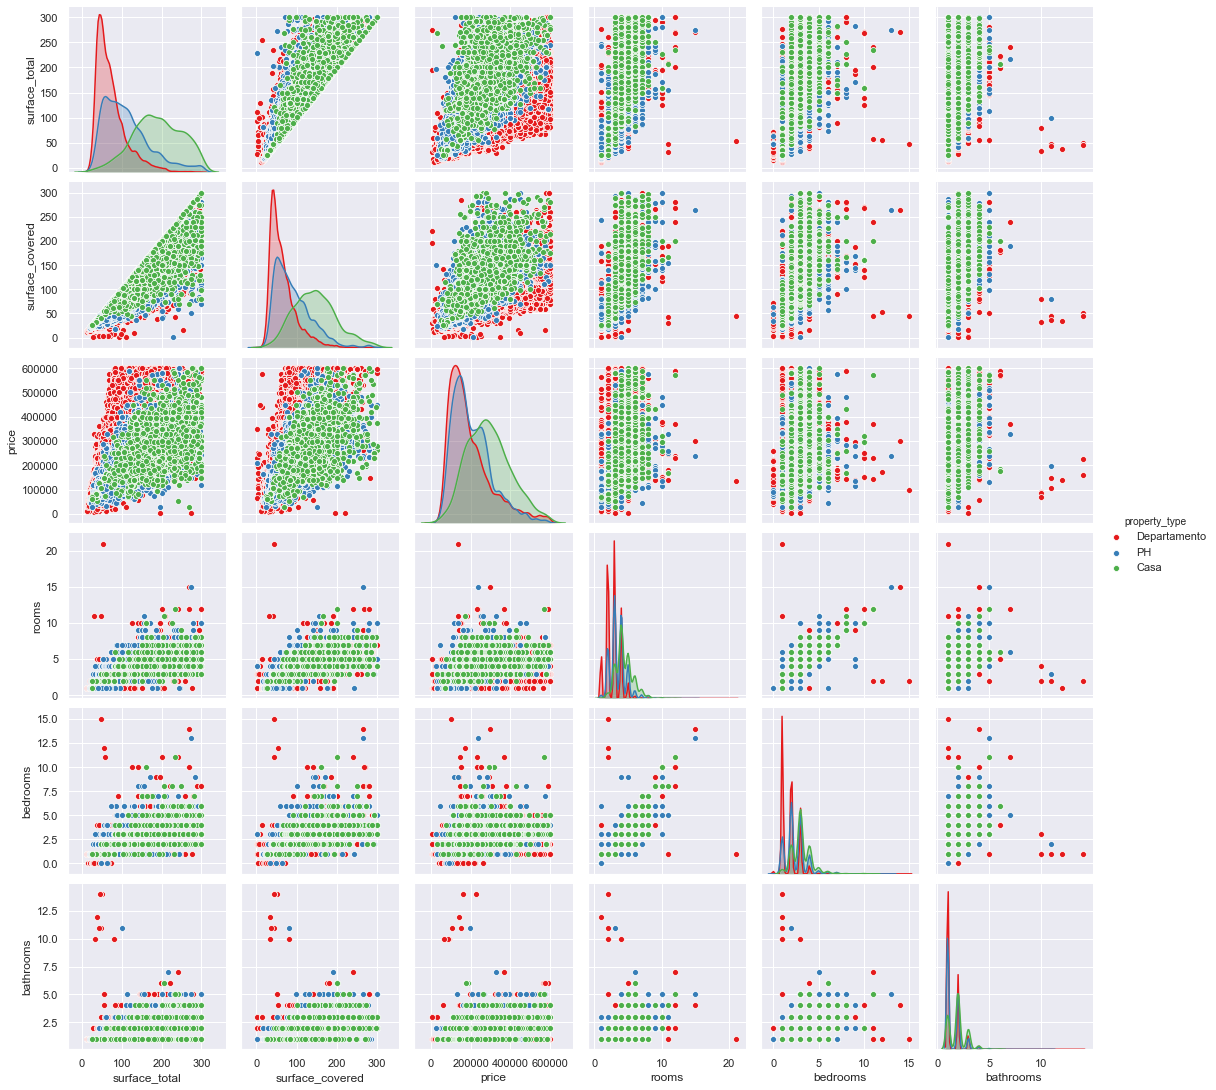

In [25]:
data_filtro_especificos=dataset_analisis[mascara_pairplot]
sns.set()
sns.pairplot(data_filtro_especificos,hue="property_type",vars=["surface_total","surface_covered","price","rooms", "bedrooms", "bathrooms"],palette='Set1')
plt.savefig("salida.png")

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

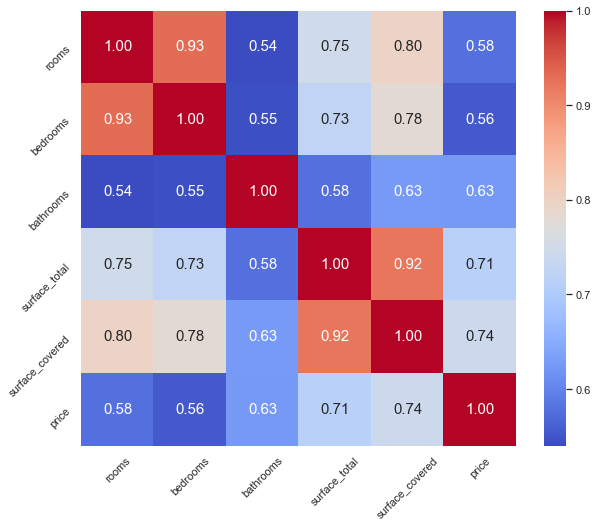

In [26]:
corr = data_filtro_especificos.drop(['start_date','end_date','created_on','Pais','Region','Barrio','currency','title','description','operation_type'],axis = 'columns').corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

**Pregunta 1:** ¿cual es la propiedad mas barata y en que barrio esta?

In [27]:
dataset_analisis[dataset_analisis.price==dataset_analisis.price.min()]

,start_date,end_date,created_on,Pais,Region,Barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
62989,2019-03-28,2019-03-30,2019-03-28,Argentina,Capital Federal,Palermo,5.0,4.0,4.0,340.0,320.0,6000.0,USD,Mariscal Ramon Castilla 2800 - Palermo Chico,Exclusivo piso de 320m2 con 4 dormitorios empl...,Departamento,Venta
96337,2019-11-06,2019-12-23,2019-11-06,Argentina,Capital Federal,Puerto Madero,5.0,3.0,3.0,195.0,195.0,6000.0,USD,RENOIR 2 - 3 DORMITORIOS EN SUITE - PUERTO MAD...,"En piso alto, 3 suites con dependencia. Se alq...",Departamento,Venta
102589,2019-04-30,2019-05-11,2019-04-30,Argentina,Capital Federal,Recoleta,3.0,2.0,2.0,340.0,200.0,6000.0,USD,Alquiler Dúplex 3 Amb. Con Terraza y Pileta,Corredor Responsable: GABRIELA FERNANDEZ - CPI...,Departamento,Venta
117012,2019-03-15,2019-06-23,2019-03-15,Argentina,Capital Federal,Puerto Madero,3.0,2.0,3.0,275.0,220.0,6000.0,USD,Retasado Bajo el Valor Triplex impecable en Lo...,EXCELENTE triplex de 3 ambientes.En el primer ...,Departamento,Venta


**Pregunta 2:** ¿cual es la propiedad mas cara y en que barrio esta?

In [28]:
dataset_analisis[dataset_analisis.price==dataset_analisis.price.max()]

,start_date,end_date,created_on,Pais,Region,Barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
76894,2019-10-25,2019-11-06,2019-10-25,Argentina,Capital Federal,Palermo,1.0,1.0,4.0,43.0,43.0,32434232.0,USD,Venta Departamento en Palermo Capital Federal ...,"Departamento en Venta, PRUEBA PRUEBA, con una...",Departamento,Venta


**Pregunta 3** ¿Cual son los los barrios con valores promedios mas altos?

In [29]:
#Obtenemos la media de precios de los diez primeros barrios
dataset_analisis.groupby(['Barrio']).mean().sort_values(by=['price'],ascending=False)['price'].head(10)

Barrio
Puerto Madero    985202.209622
Las Cañitas      469488.154822
Recoleta         410003.824502
Belgrano         377029.863438
Palermo          354744.484662
Retiro           342064.363858
Nuñez            305920.994914
Barrio Norte     296231.219199
Villa Devoto     244957.827684
Coghlan          222258.858362
Name: price, dtype: float64

In [30]:
#Obtenemos los diez barrios con menor valor medio
dataset_analisis.groupby(['Barrio']).mean().sort_values(by=['price'],ascending=False)['price'].tail(10)

Barrio
Pompeya          148006.045045
Congreso         145158.527571
Balvanera        141984.003400
Tribunales       140076.363636
San Nicolás      133185.211111
Villa Lugano     129762.934911
San Cristobal    129577.392105
Villa Soldati    122472.463768
Boca             120780.071642
Constitución     103759.853814
Name: price, dtype: float64

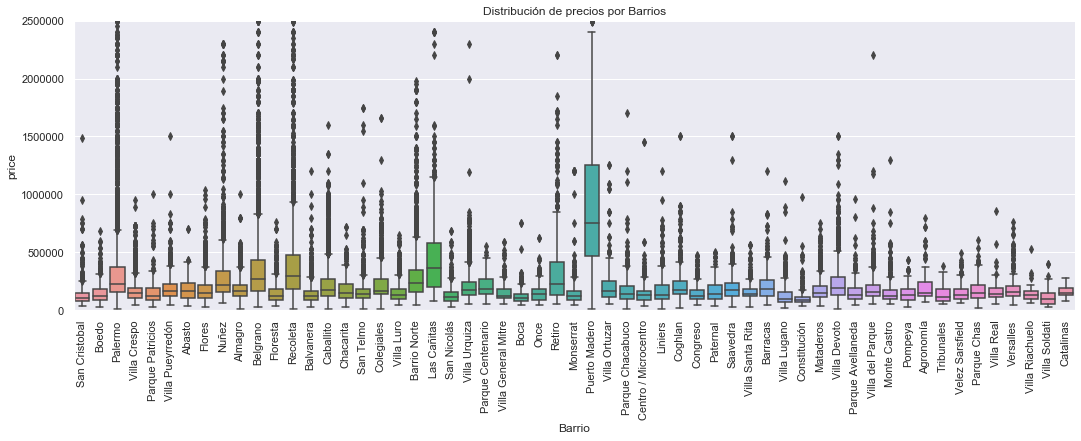

In [31]:
#Graficamos la distribución de precios por barrios
cat=sns.catplot(data=dataset_analisis,x="Barrio",y = "price",kind='box',height=5,aspect=3)
plt.xticks(rotation = 90)
plt.ylim(0,2500000)
plt.title('Distribución de precios por Barrios')
plt.show()

**Respuestas**

Teniedno en cuenta las preguntas planteadas vemos que la propiedad mas cara esta en Palermo, como así también la mas barata que tiene el mismo valor que otras de Puerto Madero y Las Cañitas (USD 6000), lo cual parece poco razonable, más si miramos la superficie cubierta, si queremos responder la pregunta planteada en el ejemplo, podemos decir que el barrio mas caro es Puerto Madero porque la media supera ampliamente al resto de los barrios, aunque la propiedad mas cara esté en Palermo. Por lo que se ve en el dataset la mayoría de las propiedades son departamentos, alrededor del 70%, y Palermo es el barrio del cual hay más propiedades publicadas, por lo cual ante cualquier pregunta que nos hagamos del dataset es muy probable que nos aparezcan publicaciones de este tipo.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión - para predecir el precio de las propiedades tipo Departamento, PH y Casa en la Ciudad Autónoma de Buenos Aires (Capital Federal). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas

**Filtrando el dataset**

In [32]:
data_filtros=dataset_properati[(dataset_properati.property_type.isin(['Departamento','Casa','PH'])) & (dataset_properati.Region == 'Capital Federal') & ((dataset_properati['surface_total']>=15) & (dataset_properati['surface_total']<=1000)) & (dataset_properati['price']<=4000000)]
data_modelos=data_filtros.drop(['start_date','end_date','created_on','lat','lon','Pais','Region','Barrio','currency','title','description','property_type','operation_type'],axis = 1)
data_modelos=data_modelos.dropna()
data_modelos.shape

(81019, 6)

**Seleccionar las variables predictoras (X) y la variable a predecir (y).**

In [33]:
X = data_modelos.drop("price", axis=1)
y = data_modelos.price
X.shape

(81019, 5)

**Realizar un Train/Test split de los datos**

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713,) (24306, 5) (24306,)


**Generar un modelo benchmark y evaluarlo**

In [35]:
#Generamos el y_train e y_test asumiendo que todos los valores son la media del conjunto de datos 
#de Train y Test respectivamente
y_train_pred_bench=np.full(y_train.shape,np.mean(y_train))
y_test_pred_bench=np.full(y_test.shape,np.mean(y_test))

In [36]:
#mse para train
from sklearn.metrics import mean_squared_error
bench_train_mse=np.sqrt(mean_squared_error(y_train,y_train_pred_bench))
bench_train_mse

297502.6815838595

In [37]:
#mse para test
bench_test_mse=np.sqrt(mean_squared_error(y_test,y_test_pred_bench))
bench_test_mse

302293.37469186354

**Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.**

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [39]:
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

**Evaluar los modelos obtenidos**. 
Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. 
También, realiza gráficos de valores reales vs. valores predichos

Modelo: Árbol de Decisión
rmse en Train: 191783.485243933
rmse en Test: 194688.15091192327


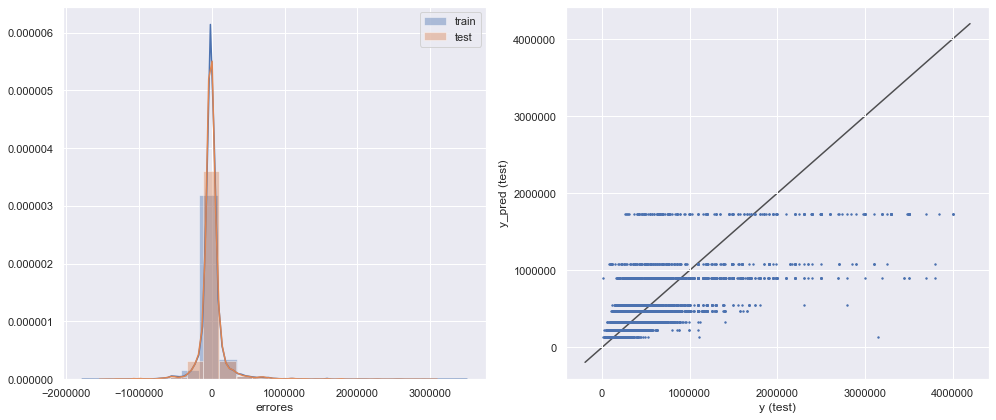

Modelo: Vecinos más cercanos
rmse en Train: 121300.24049431273
rmse en Test: 155040.1332898459


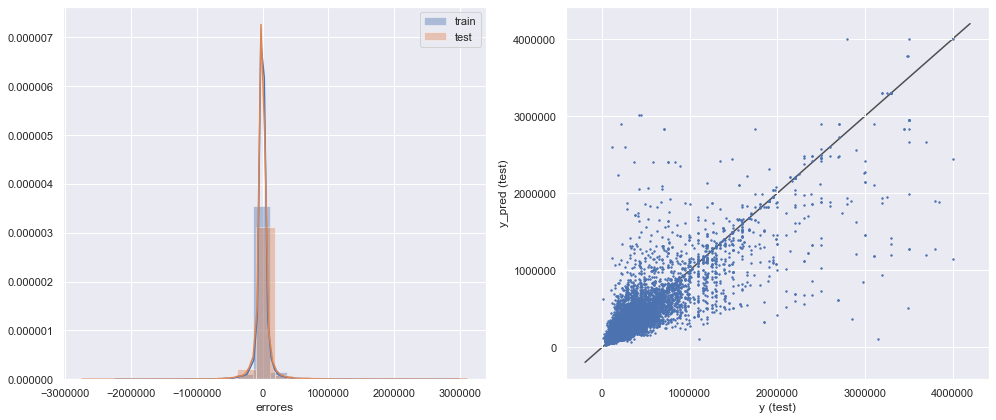

In [40]:
from sklearn.metrics import mean_squared_error

modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'rmse en Train: {rmse_train}')
    print(f'rmse en Test: {rmse_test}')
    
    plt.figure(figsize = (14,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

**Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.**

Optimización para vecinos más cercanos

In [41]:
# Definimos las listas vacias para los valores de mse deseados

lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = np.arange(1,15)

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
     
    # Definir el modelo con el valor de vecinos deseado
    reg = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    reg.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = reg.predict(X_train)
    train_mse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = reg.predict(X_test)
    test_mse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_mse)
    lista_rmse_test.append(test_mse)

Text(0, 0.5, 'rmse_test')

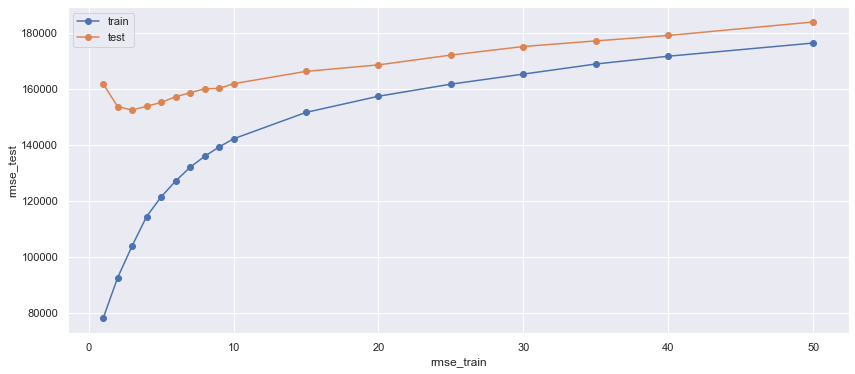

In [42]:
plt.figure(figsize = (14,6))
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('rmse_train')
plt.ylabel('rmse_test')

Optimización para Arbol de desicion

In [43]:
# Definimos las listas vacias para los valores de mse deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,30)

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    tree = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    tree.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree.predict(X_train)
    train_mse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree.predict(X_test)
    test_mse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_mse)
    lista_rmse_test.append(test_mse)

Text(0, 0.5, 'Exactitud')

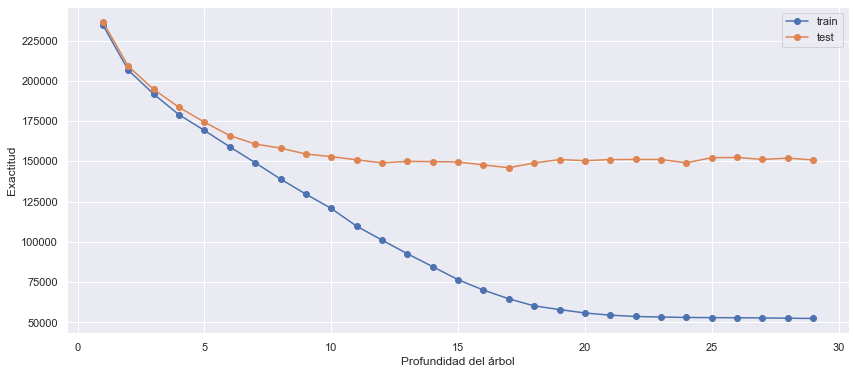

In [44]:
plt.figure(figsize = (14,6))
plt.plot(max_depths,lista_rmse_train,'o-',label='train' )
plt.plot(max_depths,lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud')

**Corremos los modelos con los valores optimos según el punto anterior**

In [45]:
tree_regressor = DecisionTreeRegressor(max_depth=10, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Modelo: Árbol de Decisión
rmse en Train: 120797.5008434747
rmse en Test: 152950.67757423845


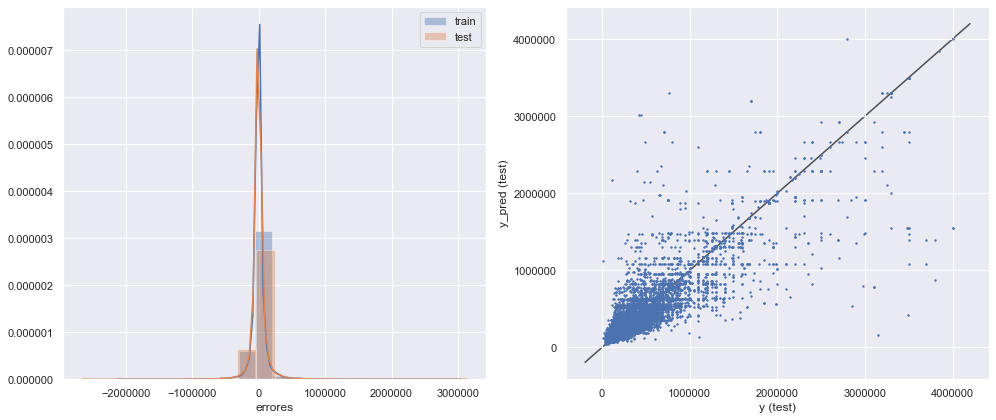

Modelo: Vecinos más cercanos
rmse en Train: 121300.24049431273
rmse en Test: 155040.1332898459


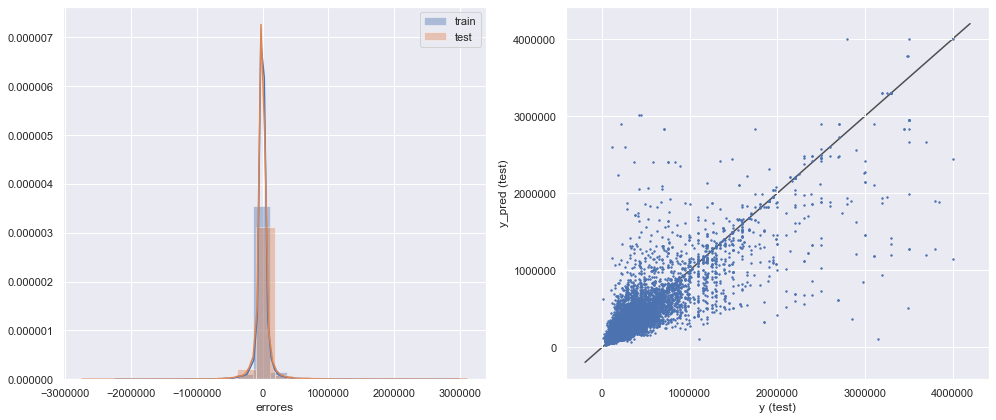

In [46]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'rmse en Train: {rmse_train}')
    print(f'rmse en Test: {rmse_test}')
    
    plt.figure(figsize = (14,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

**Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué?**

Entre los modelos entrenados elegiría el de Arboles de disición, porque si bien no hay mucha diferencia en el rsme obtenido entre ambos modelos es el que menor rmse tiene, a pesar de que es un poco mas grande la diferencia entre train y test, pero aún así no es demasiado grande lo cual se puede afirmar que no hay un gran sobreajuste.

**¿Qué información no estás usando que podría ayudar al modelo? ¿Qué información puede estar demás o repetida?**

Considero que el modelo debería específico quizás por tipo de Propiedad, al menos con las principales, plantearía tres modelos por separado porque entiendo que son muy distintas las características de un departamento a una casa. En cuanto a la información repetida considero que la cantidad de habitaciones y la cantidad de dormitorios puede ser información repetida, de hecho tienen alta correlación entre ambas.